In [1]:
!ls

2016PresidentialPrep.ipynb     TX_Presidential_2016.csv
2016PresidentialTX_Cleaned.csv


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 5000)

In [3]:
df = pd.read_csv("TX_Presidential_2016.csv")
df.head(5)

,County,FIPS,VTD,cntyvtd,Office,Name,Party,Incumbent,Votes
0,Anderson,1,1,10001,President,Clinton,D,N,262
1,Anderson,1,2,10002,President,Clinton,D,N,181
2,Anderson,1,3,10003,President,Clinton,D,N,94
3,Anderson,1,4,10004,President,Clinton,D,N,96
4,Anderson,1,5,10005,President,Clinton,D,N,9


In [4]:
# filter to only take office = "Presidential"
df = df[df["Office"] == "President"]
df["Office"].unique()

array(['President'], dtype=object)

In [5]:
# drop incumbent, office, party
df.drop(columns=["Office", "Incumbent", "Party", "FIPS"], inplace=True)
df.head(1)

,County,VTD,cntyvtd,Name,Votes
0,Anderson,1,10001,Clinton,262


In [6]:
# rename the columns
colMapper = {"Name":"Candidate", "VTD":"Precinct #"}
df.rename(colMapper, inplace=True, axis=1)
df.head(1)

,County,Precinct #,cntyvtd,Candidate,Votes
0,Anderson,1,10001,Clinton,262


In [7]:
df.sort_values(by=["Precinct #", "cntyvtd"]).head(100)

,County,Precinct #,cntyvtd,Candidate,Votes
149051,Harris,0001A,2010001A,Clinton,1266
150078,Harris,0001A,2010001A,Trump,495
151105,Harris,0001A,2010001A,Johnson,99
152132,Harris,0001A,2010001A,Stein,23
153159,Harris,0001A,2010001A,Write-In,8
232700,Lynn,0001A,3050001A,Clinton,36
232715,Lynn,0001A,3050001A,Trump,120
232730,Lynn,0001A,3050001A,Johnson,6
232745,Lynn,0001A,3050001A,Stein,2
232760,Lynn,0001A,3050001A,Write-In,0


# change candidate name to full name and write-in to others

In [8]:
candidate_to_keep = {'Clinton':'Hillary Clinton', 'Johnson':'Gary Johnson',
                     'Stein':'Jill Stein', 'Trump':'Donald J. Trump'}

In [9]:
for index, row in df.iterrows():
    cur = row["Candidate"]
    if cur in candidate_to_keep.keys():
        df.at[index, "Candidate"] = candidate_to_keep[cur]
    else:
        df.at[index, "Candidate"] = "Other"
        
df["Candidate"].unique()

array(['Hillary Clinton', 'Donald J. Trump', 'Gary Johnson', 'Jill Stein',
       'Other'], dtype=object)

# merge dataset into a row for each precinct

In [10]:
grouped = df.groupby(["Precinct #", "cntyvtd", "County", "Candidate"])
grouped.sum()

Votes
Precinct # cntyvtd  County Candidate             
0001A      2010001A Harris Donald J. Trump    495
                           Gary Johnson        99
                           Hillary Clinton   1266
                           Jill Stein          23
                           Other                8
...                                           ...
999        2010999  Harris Donald J. Trump      0
                           Gary Johnson         0
                           Hillary Clinton      0
                           Jill Stein           0
                           Other                0

[45410 rows x 1 columns]

In [11]:
# new dataframe
columns = ["County", "cntyvtd", "Precinct #", "Hillary Clinton/Dem",
           "Donald J. Trump/Rep", "Gary Johnson/Lib", "Jill Stein/Grn",
           "Other/Other", "Total Votes"]

new_TX = pd.DataFrame(columns=columns)
new_TX.head()

,County,cntyvtd,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes


In [12]:
vote_column_name = {'Hillary Clinton': "Hillary Clinton/Dem", 
                    'Gary Johnson': "Gary Johnson/Lib", 'Jill Stein': "Jill Stein/Grn",
                    'Donald J. Trump': "Donald J. Trump/Rep", "Other": "Other/Other"}


# iterate the groupby df
print("################## Merging TX Dataframe ##################")

new_row = ""
cur_precinct = ""
cur_county = ""
total_votes = 0
counter = 0

for index, group in grouped:
    
    if counter%1000 == 0:
        print("#", end="")
    
    cur_row = group.loc[:].head(1)
    precinct = cur_row["Precinct #"].values[0]
    county = cur_row["County"].values[0]

    if precinct != cur_precinct or county != cur_county:
        if cur_precinct != "":
            # add TotalVotes to new row
            new_row["Total Votes"] = total_votes
            # add new_row to new_TX dataframe
            new_TX = pd.concat([new_TX, new_row], ignore_index=True, sort=False)
            
        # reset vars
        cur_precinct = precinct
        cur_county = county
        new_row = ""
        total_votes = 0
    
    if type(new_row) == str:
        # get columns other than Total (Vote)
        new_row = cur_row[["County", "cntyvtd", "Precinct #"]]

    candidate_key = cur_row["Candidate"].values[0]
    new_row[vote_column_name[candidate_key]] = cur_row["Votes"].values[0]
    total_votes += cur_row["Votes"].values[0]
    
    counter +=1
    
print("\n################ Done Merging TX Dataframe ###############")

################## Merging TX Dataframe ##################
##############################################
################ Done Merging TX Dataframe ###############


In [13]:
new_TX.sort_values(by=["County", "Precinct #", "cntyvtd"], inplace=True)
new_TX.head()

,County,cntyvtd,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes
378,Anderson,10001,1,262,742,18,5,3,1030
521,Anderson,10010,10,37,296,3,0,0,336
1259,Anderson,10011,11,130,592,15,2,0,739
1847,Anderson,10013,13,268,749,30,7,1,1055
2198,Anderson,10015,15,84,514,7,1,0,606


In [14]:
# add County suffix to all county of new_TX
for index, row in new_TX.iterrows():
    new_TX.at[index, "County"] = row["County"] + " County"
    
new_TX.head()

,County,cntyvtd,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes
378,Anderson County,10001,1,262,742,18,5,3,1030
521,Anderson County,10010,10,37,296,3,0,0,336
1259,Anderson County,10011,11,130,592,15,2,0,739
1847,Anderson County,10013,13,268,749,30,7,1,1055
2198,Anderson County,10015,15,84,514,7,1,0,606


In [15]:
#new_TX.to_csv("2016PresidentialTX_Cleaned.csv")

# load precinct geographic data

In [16]:
gdf = gpd.read_file('../../geographic/Precinct/TX_Precinct.json')
gdf.head(1)

,CNTY,COLOR,VTD,CNTYVTD,VTDKEY,Shape_area,Shape_len,geometry
0,1,6,0001,10001,1,5.616316e+06,15020.544212,"POLYGON ((-95.60102 31.74519, -95.60095 31.745..."


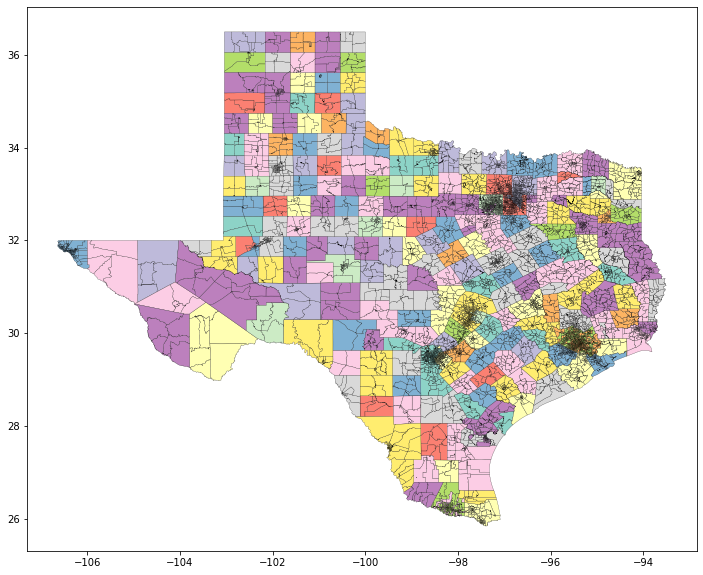

In [17]:
# plot the geojson
gdf.plot(linewidth=0.2, edgecolor="black", cmap='Set3', figsize=(13, 10))

# convert the coodinate system of precint data

In [19]:
# gdf.crs = {'init': 'EPSG:3081 NAD83'}

In [20]:
# print(gdf.crs)

In [21]:
# test = gdf.to_crs("epsg:4326")

In [22]:
# test.head()

In [26]:
# test.to_file("../../geographic/Precinct/Texas_Precinct.json",driver='GeoJSON')

# clean precinct data

In [17]:
# CNTY	COLOR	VTD	CNTYVTD	VTDKEY	Shape_area	Shape_len
gdf.drop(["CNTY", "COLOR", "VTD", "VTDKEY", "Shape_area", "Shape_len"], inplace=True, axis=1)
gdf.rename({"CNTYVTD": "cntyvtd"}, axis=1, inplace=True)
gdf.sort_values(["cntyvtd"], inplace=True)

In [18]:
gdf.head(1)

,cntyvtd,geometry
0,10001,"POLYGON ((-95.60102 31.74519, -95.60095 31.745..."


# try to map precinct to voting using cntyvtd

In [19]:
print(len(gdf), len(new_TX))

9082 9081


In [20]:
# voting data is missing one. find out which is it
pres = sorted(list(new_TX["cntyvtd"].unique()))
prec = sorted(list(gdf["cntyvtd"].unique()))

In [21]:
zipped = list(zip(pres, prec))
for tup in zipped:
    if tup[0] != tup[1]:
        print(tup)
        break

('2011000', '2010999')


In [22]:
# check what county does precinct 2010998 belong to
new_TX[new_TX["cntyvtd"]=="2010998"]

,County,cntyvtd,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes
9080,Harris County,2010998,998,14,19,3,0,0,36


In [23]:
gdf[gdf["cntyvtd"]=="2010999"]

,cntyvtd,geometry
4981,2010999,"POLYGON ((-95.36672 29.77393, -95.36687 29.773..."


# voting data missing 2010999

In [24]:
# add cntyvtd 2010999 to voting data
columns = new_TX.columns
row = [["Harris County", "2010999", "999", 0, 0, 0, 0, 0, 0]]
new_row = pd.DataFrame(row, columns=columns)
new_TX = pd.concat([new_TX, new_row], ignore_index=True)
new_TX.sort_values(["cntyvtd"], inplace=True)
new_TX[new_TX["cntyvtd"]=="2010999"]

,County,cntyvtd,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes
9081,Harris County,2010999,999,0,0,0,0,0,0


In [25]:
# voting data is missing one. find out which is it
pres = sorted(list(new_TX["cntyvtd"].unique()))
prec = sorted(list(gdf["cntyvtd"].unique()))

In [26]:
zipped = list(zip(pres, prec))
for tup in zipped:
    if tup[0] != tup[1]:
        print(tup)
        break

# now we can map voting data to precinct geo data with CNTYVTD

In [27]:
merge = gdf.merge(new_TX, left_on="cntyvtd", right_on="cntyvtd")
merge.head()

,cntyvtd,geometry,County,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes
0,10001,"POLYGON ((-95.60102 31.74519, -95.60095 31.745...",Anderson County,1,262,742,18,5,3,1030
1,10002,"POLYGON ((-95.55618 31.68776, -95.55616 31.687...",Anderson County,2,181,1318,22,5,6,1532
2,10003,"POLYGON ((-95.49198 31.74147, -95.49208 31.741...",Anderson County,3,94,663,16,2,1,776
3,10004,"POLYGON ((-95.37116 31.73750, -95.37111 31.737...",Anderson County,4,96,869,17,2,1,985
4,10005,"POLYGON ((-95.37116 31.73750, -95.37163 31.737...",Anderson County,5,9,180,2,0,0,191


In [63]:
merge.drop(["cntyvtd"], inplace=True, axis=1)

In [64]:
merge.head(1)

,geometry,County,Precinct #,Hillary Clinton/Dem,Donald J. Trump/Rep,Gary Johnson/Lib,Jill Stein/Grn,Other/Other,Total Votes
0,"POLYGON ((-95.60102 31.74519, -95.60095 31.745...",Anderson County,1,262,742,18,5,3,1030


In [28]:
merge.to_file("../congressional/Merged_helper.json", driver="GeoJSON")